In [1]:
from _tests import scripts
from scripts import utils, notebook_utils

MACRO_NAME = "flexdcim_2025"

# Model of "FlexDCIM: A 400 MHz 249.1 TOPS/W 64 Kb Flexible Digital Compute-in-Memory SRAM Macro for CNN Acceleration"

Paper by Vishal Sharma, Xin Zhang, Narendra Singh Dhakad, and Tony Tae-Hyoung Kim

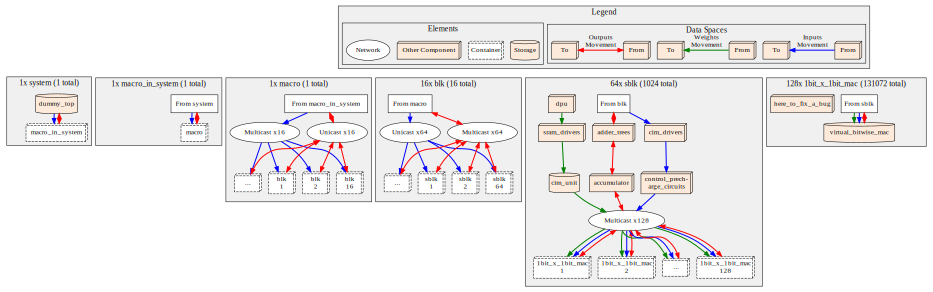

In [10]:
notebook_utils.display_diagram(notebook_utils.get_diagram(
    "flexdcim_2025",
    # ignore=DIAGRAM_DEFAULT_IGNORE,
))

In [3]:
# utils.get_spec(
#     macro=MACRO_NAME
# )

In [19]:
# TODO: check that these components are in the correct sections

# used for area and power breakdowns
memory_components = ["dpu", "cim_unit"]
adder_tree_components = ["adder_trees"]
ctrl_components = ["control_precharge_circuits", "accumulator"]
cim_drv_components = ["cim_drivers"]
wl_drv_components = ["sram_drivers"]

## Area Breakdown

This test replicates the results presented in Fig. 24 of the paper.

We show the area breakdown of the macro. The area is broken down into the following parts:
* Memory: <TODO: explanation of part>
* Adder Tree: <TODO: explanation of part>
* Control (CTRL): <TODO: explanation of part>
* CiM Driver: <TODO: explanation of part>
* WL Driver: <TODO: explanation of part>

<TODO: brief analysis of results>
* memory/bitcell array consumes the most memory
* adder tree second most

---

From Table VI:
* macro area: 0.3136 mm^2 (313,600 µm^2)
* bit-cell area: 2.3452 µm^2

Targets:
* Memory: 52.85%
* Adder Tree: 34.72%
* CTRL: 4.38%
* CIM_DRV: 4.45%
* WL_DRV: 3.60%

In [26]:
# TODO: start moving all evaluation code into _tests.py?

macro_area = 313_600e-12 # 313,600 µm^2

results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [27]:
[x for x in results[0].per_component_area.items() if x[1] > 0]

[('dpu', 5.56814336e-05),
 ('adder_trees', 1.3323776e-08),
 ('sram_drivers', 5.4824140800000004e-11),
 ('cim_drivers', 6.5788928e-11),
 ('control_precharge_circuits', 1.694976e-10),
 ('accumulator', 9.14765824e-11),
 ('cim_unit', 1.3844479999999999e-08)]

In [22]:
results.combine_per_component_area(memory_components, "Memory")
results.add_compare_ref_area("Memory", 0.5285 * macro_area)
results.combine_per_component_area(adder_tree_components, "Adder Tree")
results.add_compare_ref_area("Adder Tree", 0.3472 * macro_area)
results.combine_per_component_area(ctrl_components, "CTRL")
results.add_compare_ref_area("CTRL", 0.0438 * macro_area)
results.combine_per_component_area(cim_drv_components, "CIM_DRV")
results.add_compare_ref_area("CIM_DRV", 0.0445 * macro_area)
results.combine_per_component_area(wl_drv_components, "WL_DRV")
results.add_compare_ref_area("WL_DRV", 0.0360 * macro_area)
# results.clear_zero_areas()

In [28]:
# Ultra simple area printing
macro_area = 313_600e-12  # 313,600 µm^2 from paper
model_total_area = results[0].area

print("===== TOTAL AREA =====")
print("Model total area:", model_total_area*1e12, "µm²")
print("Paper total area:", macro_area*1e12, "µm²")
print("Difference:", (model_total_area-macro_area)*1e12, "µm²",
      f"({(model_total_area/macro_area-1)*100:.2f}%)")

print("\n===== COMPONENT AREAS =====")
print("Component | Model Area (µm²) | Target Area (µm²) | Model % | Target %")
print("-" * 80)

# Target percentages from the paper
target_components = {
    "dpu": 52.85,          # Memory
    "adder_trees": 34.72,  # Adder Tree
    "control_precharge_circuits": 2.19,  # Half of CTRL (4.38/2)
    "accumulator": 2.19,  # Half of CTRL (4.38/2)
    "cim_drivers": 4.45,   # CIM_DRV
    "sram_drivers": 3.60,  # WL_DRV
}

# Print all components in per_component_area
print("\n===== ALL MODEL COMPONENTS =====")
for key in results[0].per_component_area:
    if isinstance(results[0].per_component_area[key], (int, float)):
        area = results[0].per_component_area[key] * 1e12
        pct = (area / (model_total_area*1e12)) * 100
        print(f"{key}: {area} µm² ({pct:.2f}%)")

===== TOTAL AREA =====
Model total area: 55708983.44325119 µm²
Paper total area: 313600.0 µm²
Difference: 55395383.44325119 µm² (17664.34%)

===== COMPONENT AREAS =====
Component | Model Area (µm²) | Target Area (µm²) | Model % | Target %
--------------------------------------------------------------------------------

===== ALL MODEL COMPONENTS =====
dummy_top: 0.0 µm² (0.00%)
inter_blk_spatial: 0.0 µm² (0.00%)
inter_sblk_spatial: 0.0 µm² (0.00%)
dpu: 55681433.6 µm² (99.95%)
adder_trees: 13323.776 µm² (0.02%)
sram_drivers: 54.8241408 µm² (0.00%)
cim_drivers: 65.788928 µm² (0.00%)
control_precharge_circuits: 169.4976 µm² (0.00%)
accumulator: 91.4765824 µm² (0.00%)
cim_unit: 13844.48 µm² (0.02%)
inter_1bit_x_1bit_mac_spatial: 0.0 µm² (0.00%)
here_to_fix_a_bug: 0.0 µm² (0.00%)
virtual_bitwise_mac: 0.0 µm² (0.00%)
accumulator <==> cim_unit: 0.0 µm² (0.00%)
adder_trees <==> sram_drivers: 0.0 µm² (0.00%)
cim_drivers <==> control_precharge_circuits: 0.0 µm² (0.00%)
cim_unit <==> inter_1bit_x

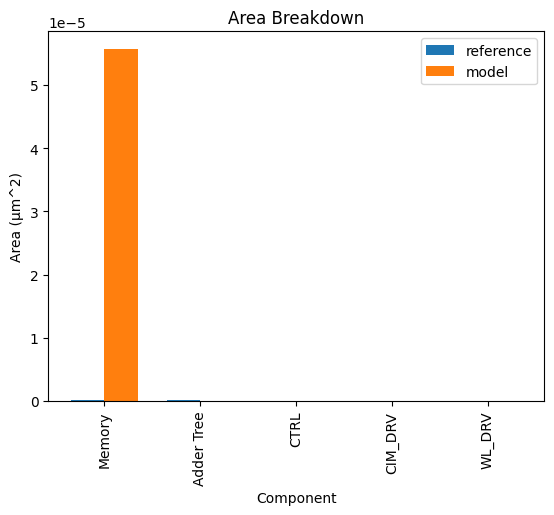

In [ ]:
notebook_utils.bar_side_by_side(
    results[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (µm^2)",
    title="Area Breakdown",
)

## Power Breakdown

This test replicates the results presented in Fig. 24 of the paper.

We show the power breakdown of the macro. The power is broken down into the following parts:
* Memory: <TODO: explanation of part>
* Adder Tree: <TODO: explanation of part>
* Control (CTRL): <TODO: explanation of part>
* CiM Driver: <TODO: explanation of part>

Notably, the power contribution of the WL Driver is 0.0% because, as stated in the paper, "for CIM mode, the CIM Driver module controls the wordlines. Hence the power consumption of the WL driver has been considered under the CIM driver block."

<TODO: brief analysis of results>
* ctrl is the most
* adder tree and memory follow

---

Targets:
* Memory: 19.4%
* Adder Tree: 23.8%
* CTRL: 44.0%
* CIM_DRV: 12.8%
* WL_DRV: 0.0%, "For CIM mode, the CIM Driver
module controls the wordlines. Hence the power consumption
of the WL driver has been considered under the CIM driver
block."

In [12]:
results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [13]:
[x for x in results[0].per_component_energy.items() if x[1] > 0]

[('cim_unit', 1.711276032e-13),
 ('accumulator', 1.241513984e-08),
 ('control_precharge_circuits', 1.00663296e-11),
 ('cim_drivers', 1.023410176e-06),
 ('sram_drivers', 6.870269952e-19),
 ('adder_trees', 6.274678784e-09),
 ('dpu', 9.395240959999999e-17)]

In [14]:
# measured by pJ/full array of MACs, so multiply all by 512 x 128 (?)
total_energy = 0.15 # TODO: currently just a filler number

results.combine_per_component_energy(memory_components, "Memory")
results.add_compare_ref_energy("Memory", 0.194 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(adder_tree_components, "Adder Tree")
results.add_compare_ref_energy("Adder Tree", 0.238 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(ctrl_components, "CTRL")
results.add_compare_ref_energy("CTRL", 0.440 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(cim_drv_components, "CIM_DRV")
results.add_compare_ref_energy("CIM_DRV", 0.128 * total_energy * 512 * 128 * 1e-12)
results.combine_per_component_energy(wl_drv_components, "WL_DRV")
results.add_compare_ref_energy("WL_DRV", 0)

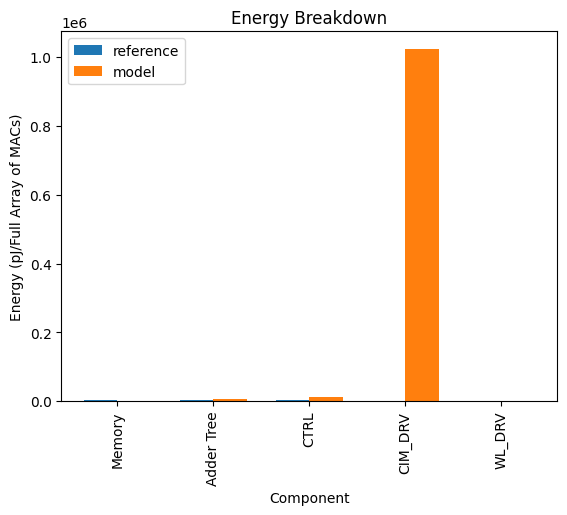

In [15]:
notebook_utils.bar_side_by_side(
    results[0].get_compare_ref_energy()*1e12,
    xlabel="Component",
    ylabel="Energy (pJ/Full Array of MACs)",
    title="Energy Breakdown",
)

## Energy Efficiency

This test replicates the results presented in Fig. 23 of the paper.

---

Measured in TOPS/W

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:23<00:00,  3.30s/it]


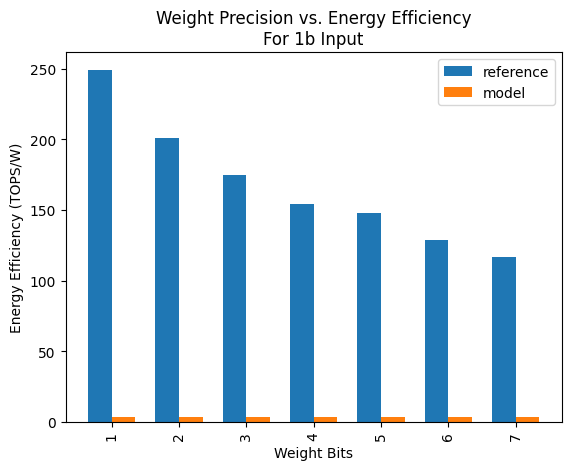

In [13]:
EXPECTED_EFFICIENCY_1b_INPUT = {
    1: 249.1,
    2: 201.0,
    3: 175.0,
    4: 153.9,
    5: 148.0,
    6: 129.0,
    7: 117.0,
    8: 110.7,
}

results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=i,
            INPUT_BITS=1,
        ),
    )
    for i in range(1, 8)
)

expected_flattened = list(EXPECTED_EFFICIENCY_1b_INPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("tops_per_w", e)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Weight Precision vs. Energy Efficiency\nFor 1b Input",
)

In [18]:
i = 4

print(results[i].variables["WEIGHT_BITS"])
print(results[i].variables["INPUT_BITS"])
print(results[i].tops_per_w)

5
1
{'reference': 148.0, 'model': 3.6484741293095455}


100%|██████████| 7/7 [00:22<00:00,  3.23s/it]


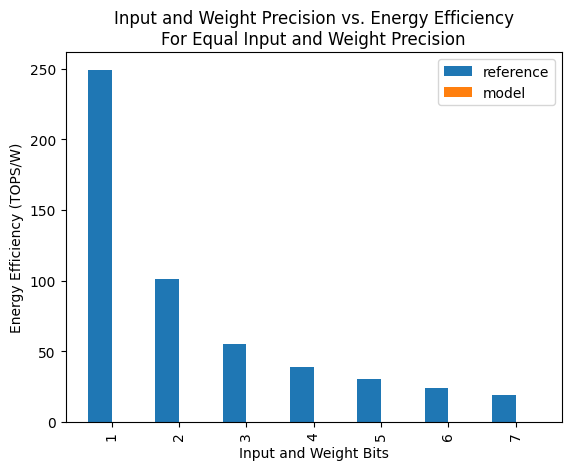

In [76]:
EXPECTED_EFFICIENCY_SCALED_INPUT = {
    1: 249.1,
    2: 101.0,
    3: 55.0,
    4: 38.5,
    5: 30.0,
    6: 24.0,
    7: 19.0,
    8: 13.84,
}

results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            INPUT_BITS=i,
            WEIGHT_BITS=i,
        ),
    )
    for i in range(1, 8)
)

expected_flattened = list(EXPECTED_EFFICIENCY_SCALED_INPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("tops_per_w", e)

notebook_utils.bar_side_by_side(
    {r.variables["WEIGHT_BITS"]: r.tops_per_w for r in results},
    # ax=axs[i],
    xlabel="Input and Weight Bits",
    ylabel="Energy Efficiency (TOPS/W)",
    title=f"Input and Weight Precision vs. Energy Efficiency\nFor Equal Input and Weight Precision",
)

## Throughput

This test replicates the results presented in Table V of the paper.

---

Target: 819.2 GOPS

Test at 400 MHz

In [11]:

results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            MAX_UTILIZATION=True,
            WEIGHT_BITS=i,
            INPUT_BITS=j,
            # N_REGS_PER_COL=[1, 2, 4, 8, 16][j],
            # N_ROWS_PER_REG=128 // [1, 2, 4, 8, 16][j],
            # FORCE_100MHZ=False,
            # OUTPUT_BITS=16,
        ),
    )
    for i in (1, 8)
    for j in (1, 8)
)

# add attributes for GOPS, computed from results TOPS
for r in results:
    r.gops = r.tops * 1e3

100%|██████████| 4/4 [00:17<00:00,  4.27s/it]


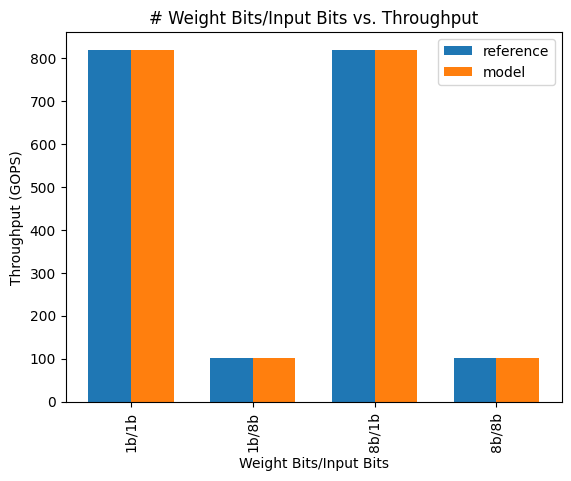

In [12]:
EXPECTED_THROUGHPUT = {
    # 1b~8b Weight /1b~8b Input
    "1b/1b": 819.2,
    "1b/8b": 102.4,
    "8b/1b": 819.2,
    "8b/8b": 102.4,
}

expected_flattened = list(EXPECTED_THROUGHPUT.values())
for r, e in zip(results, expected_flattened):
    r.add_compare_ref("gops", e)

notebook_utils.bar_side_by_side(
    {
        "1b/1b": results[0].gops,
        "1b/8b": results[1].gops,
        "8b/1b": results[2].gops,
        "8b/8b": results[3].gops,
    }, # TOPS -> GOPS
    # ax=axs[i],
    xlabel="Weight Bits/Input Bits",
    ylabel="Throughput (GOPS)",
    title=f"# Weight Bits/Input Bits vs. Throughput",
)

## Weight Precision Scaling

This test presents our design space exploration, extending the results presented in the FlexDCIM paper by exploring how scaling the weight bit precision beyond 8b impacts other metrics of the macro.

---

TODO: what variables/component arguments need to be changed to accurately reflect changing weight precision >8b?

# testing

In [13]:
MACRO_NAME = "flexdcim_2025"

utils.get_spec(
    macro=MACRO_NAME
)

{'processors': [processors.ArrayProcessor],
 '_required_processors': [pytimeloop.timeloopfe.v4.processors.constraint_attacher.ConstraintAttacherProcessor,
  pytimeloop.timeloopfe.v4.processors.sparse_opt_attacher.SparseOptAttacherProcessor,
  pytimeloop.timeloopfe.v4.processors.constraint_macro.ConstraintMacroProcessor,
  pytimeloop.timeloopfe.v4.processors.dataspace2branch.Dataspace2BranchProcessor,
  pytimeloop.timeloopfe.v4.processors.permutation_optimizer.PermutationOptimizerProcessor,
  pytimeloop.timeloopfe.v4.processors.required_actions.RequiredActionsProcessor],
 'globals': {'version': '0.4',
  'environment_variables': {'TIMELOOP_OUTPUT_STAT_SCIENTIFIC': 1,
   'TIMELOOP_OUTPUT_STAT_DEFAULT_FLOAT': 0,
   'TIMELOOP_HIDE_INCONSEQUENTIAL_STATS': 0},
  'expression_custom_functions': ['/home/workspace/models/include/slicing_encoding.py'],
  'accelergy_plug_ins': ['/home/workspace/models/components/accelergy_plug_ins']},
 'architecture': {'version': '0.4',
  'nodes': ArchNodes([{'node

In [64]:
# !!! remember to use the MAX_UTILIZATION tag for simulations !!!

results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [63]:
!timeloop mapper /home/workspace/scripts/../outputs/279.139623251988480/parsed-processed-input.yaml
!cat timeloop-mapper.accelergy.log

Running apps: mapper
Found parsed-processed-input.yaml in input files. Running Timeloop without parsing or processing steps. If this is not the intended behavior, please name the input files differently.
input file: /home/workspace/outputs/279.139623251988480/parsed-processed-input.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy /home/workspace/outputs/279.139623251988480/parsed-processed-input.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Failed to run Accelergy. Did you install Accelergy or specify ACCELERGYPATH correctly? Or check accelergy.log to see what went wrong
2025-05-01 04:55:12 INFO            _                _                      
2025-05-01 04:55:12 INFO      

In [92]:
r = utils.single_test(
    utils.quick_run(
        macro="colonnade_jssc_2021",
        variables=dict(
            # INPUT_BITS=1,
            # WEIGHT_BITS=8,
            # OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

In [95]:
[x for x in r[0].per_component_area.items() if x[1] > 0]

[('row_drivers', 2.62674e-09),
 ('column_drivers', 1.00089e-08),
 ('weight_drivers', 2.62674e-09),
 ('register', 2.87244288e-08),
 ('cim_unit', 8.998912e-09),
 ('cim_logic', 1.7897553919999999e-07)]

## leftover from simulation.ipynb

In [ ]:
MACRO_NAME = ""

results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            INPUT_BITS=1,
            WEIGHT_BITS=8,
            OUTPUT_BITS=16,
            FORCE_100MHZ=True,
        ),
    )
)

In [ ]:
results = utils.parallel_test(
    utils.delayed(utils.quick_run)(
        macro=MACRO_NAME,
        variables=dict(
            INPUT_BITS=1,
            WEIGHT_BUTS=8,
            OUTPUT_BITS=16,
            VOLTAGE=v,
        )
    )
    for v in [0.8, 0.9, 1.0]
)

In [ ]:
# copied from colonnade _guide.ipynb
# see colonnade _test.py for more implementation details
results = utils.single_test(
    utils.quick_run(
        macro=MACRO_NAME,
        variables=dict(
            INPUT_BITS=1,
            WEIGHT_BITS=8,
            OUTPUT_BITS=16,
            # FORCE_100MHZ=True,
        ),
    )
)

notebook_utils.bar_side_by_side(
    results[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)

In [ ]:
# for getting max_utilization, try:
# 1. setting MAX_UTILIZATION variable to True in spec variables, as in below (and in quick_run function)
# 2. see arch.yaml modification in wang and lab-5 arch.yaml

spec = utils.get_spec(
    macro=MACRO_NAME,
    system="ws_dummy_buffer_one_macro",
    max_utilization=True,
)

# alternative, from https://github.com/mit-emze/cimloop/blob/3177b52a1a21dc64af1d80e167c716a90a45add8/workspace/models/arch/1_macro/lightning_sigc_2023/_tests.py#L20
results = utils.parallel_test(
        [utils.delayed(utils.quick_run)(
            macro=MACRO_NAME,
            variables=dict(
                MAX_UTILIZATION=True
            ),
        )]
    )